# Training Models

## Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

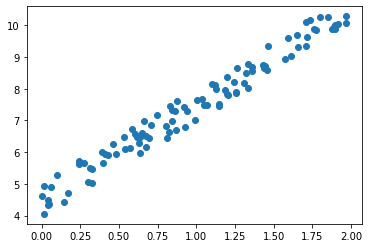

In [2]:
# Normal Equation

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1) 

plt.scatter(X, y)

In [3]:
# We will use the inv() function from NumPy's linear algebra module (np.linalg) 
# to compute the inverse of a matrix

X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.54679727],
       [2.94229712]])

In [5]:
# We can make predictions using theta_best

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.54679727],
       [10.43139151]])

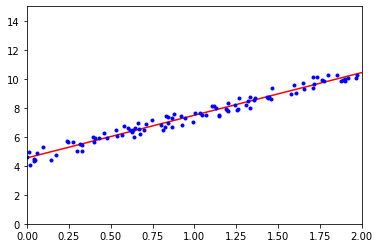

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
# Performing Linear Regression using Scikit-Learn is simple

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.54679727]), array([[2.94229712]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.54679727],
       [10.43139151]])

## Batch Gradient Descent

In [9]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initializaion

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [10]:
theta

array([[4.54679727],
       [2.94229712]])

## Stochastic Gradient Descent

In [11]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [12]:
theta

array([[4.55951892],
       [2.93500009]])

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.5209165]), array([2.94254548]))

####  Batch GD vs Stochastic GD vs Mini-batch GD

**Batch GD:**
it uses the whole training set to compute the gradients at every step.
takes a lot of time to take each step

**Stochastic GD:**
pick a random instance in the training set at every step and comput the gradient based only on that single instance.
Over time it will end up evry close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the finaly parameter values are good, but not optimal

**Mini-batch GD:**
compute the gradients on small random sets of instances called mini-batch.
can get a perfomance boost from hardware optimization of matrix prerations, especially when using GPUs.
it will end up walking around a bit closer to the minimum than Stochastic GD.

## Polynomial Regression

In [15]:
# A simple way to do this is to add powers of each feature as new features

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2+ X + 2 + np.random.randn(m, 1)

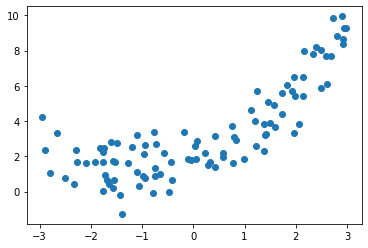

In [16]:
plt.scatter(X, y)

In [17]:
# Clearly, a straight line will never fit this data properly.
# So let's use Scikit-Learn's PolynomialFeatures class to transform our training data.

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.98551068])

In [18]:
X_poly[0]

array([1.98551068, 3.94225265])

In [19]:
# X_poly now contains the original feature of X plus the square of this feature.

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78840359]), array([[1.04157584, 0.46980286]]))

## Learning Curves

In [20]:
# these are plots of the model's performance on the training set and the validation set as a function of the training set size.

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val')

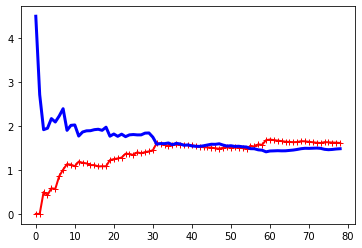

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

(0.0, 80.0, 0.0, 8.0)

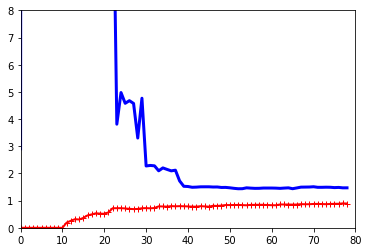

In [22]:
# above model is underfitting, 
# If your model is underfitting the training data, adding more training examples will not help.
# You need to use a more complex model or come up with better features

# Now let's look at the learning curves of a 10th-degree polynomial model on the same data

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 8])

In [23]:
# above model is overfitting

## Regularized Linear Models

#### Ridge Regression

In [24]:
# This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
# Note that the regularization term should only be added to the cost function during training.

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.96109368]])

In [25]:
# and using Stochastic GD

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

# the penalty hayperparameter sets the type of regularization term to use.
# Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector.

array([4.95444881])

#### Lasso Regression

In [26]:
# Least Absolute Shrinkage and Selection Operator Regression (Lasso)
# It adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the aquare of the l2 norm

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.92051905])

In [27]:
sgd_reg = SGDRegressor(penalty = 'l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.93681352])

#### Elastic Net

In [28]:
# Elastic Net is a middle ground between Ridge and Lasso
# Regularization term is a simple mix of both Ridge and Lasso
# ratio r = 0, this is equivalent to Ridge
# ratio r = 1, this is equivalent to Lasso

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.91624742])

## Logistic Regression

In [29]:
#Losistic REgression is commonly used to estimate the probability that an instance belongs to a particular class.

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [30]:
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int)

In [31]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

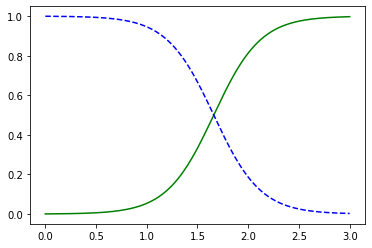

In [32]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris virginica")

## Softmax Regression

In [33]:
# The Logistic Regression model can be generalized to support multiple classes directly,
# without having to train and combine multiple binary classifiers

X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [34]:
softmax_reg.predict([[5, 2]])

array([2])

In [35]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])